# Basic Classification

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

print('TensorFlow version: ', tf.__version__)

TensorFlow version:  1.13.1


## ファッション MNIST データセットのロードロード
- 10カテゴリーの白黒画像70，000枚
- 1枚に1種類の衣料品が写っている低解像度（28 * 28 ピクセル）の画像

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


### クラス名を保存

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## データの観察

In [5]:
train_images.shape

(60000, 28, 28)

In [8]:
len(train_labels)

60000

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

## データの前処理

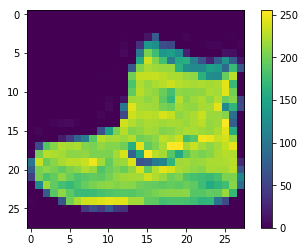

In [9]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.gca().grid(False)
plt.show()

### ピクセルの値： 0 ~ 255 -> 0 ~1

In [10]:
train_images = train_images / 255.0
test_images = test_images / 255.0

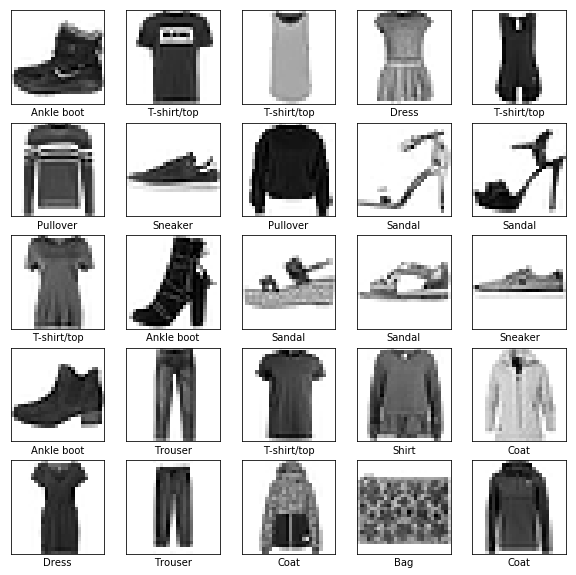

In [11]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## モデルの構築
### 層の設定
ニューラルネットワークを形作る基本的な構成要素 : 層
#### 1. ```tf.keras.layers.Flatten``` 層
- 画像を 28 * 28 ピクセルの2次元配列から，784ピクセルの1次元配列に変換
- ピクセルの行を取り崩し，横に並べる

#### 2. ```tf.keras.layers.Dense``` 層：全結合されたニューロンの層
- 最初の ```Dense``` 層 ： 128個のノード
- 最後の ```Dense``` 層 ： クラスに対応する10ノードの softmax 層

In [13]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

### モデルのコンパイル
- #### 損失関数
    - 訓練中にモデルがどれくらい正確かを測定
    - この関数を最小化し，モデルを正しい方向へ向かわせる

- #### オプティマイザ
    - モデルが見ているデータと損失関数の値から，どのようにモデルを更新するか決定

- #### メトリクス
    - 訓練とテストのステップを監視するのに使用

In [14]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## モデルの訓練
1. モデルに訓練用データを投入
2. モデルは画像とラベルの対応関係を学習
3. モデルにテスト用データセットの予測を行わせる

In [15]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 6s 104us/sample - loss: 0.4925 - acc: 0.8266
Epoch 2/5
60000/60000 [==============================] - 6s 95us/sample - loss: 0.3716 - acc: 0.8665
Epoch 3/5
60000/60000 [==============================] - 6s 103us/sample - loss: 0.3344 - acc: 0.8778
Epoch 4/5
60000/60000 [==============================] - 5s 91us/sample - loss: 0.3081 - acc: 0.8854
Epoch 5/5
60000/60000 [==============================] - 5s 90us/sample - loss: 0.2928 - acc: 0.8930


## 正解率の評価

In [16]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy: ', test_acc)

10000/10000 [==============================] - 0s 43us/sample - loss: 0.3566 - acc: 0.8711
Test accuracy:  0.8711


## 予測する

In [17]:
predictions = model.predict(test_images)

In [18]:
predictions[0]

array([2.3740966e-05, 3.1604532e-09, 1.4992208e-06, 7.6003730e-08,
       2.8737354e-06, 1.1539481e-03, 1.7921340e-05, 2.9707644e-02,
       3.9097093e-05, 9.6905333e-01], dtype=float32)

In [21]:
print('Prediction label: %d, Correct label: %d' % (np.argmax(predictions[0]), test_labels[0]))

Prediction label: 9, Correct label: 9


In [22]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    
    plt.xlabel('{} {:2.0f}% ({})'.format(class_names[predicted_label],
                                         100*np.max(predictions_array),
                                         class_names[true_label]),
               color=color)

In [25]:
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color='#777777')
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

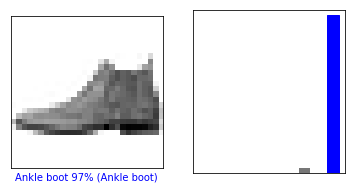

In [26]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

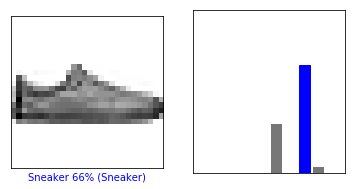

In [27]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

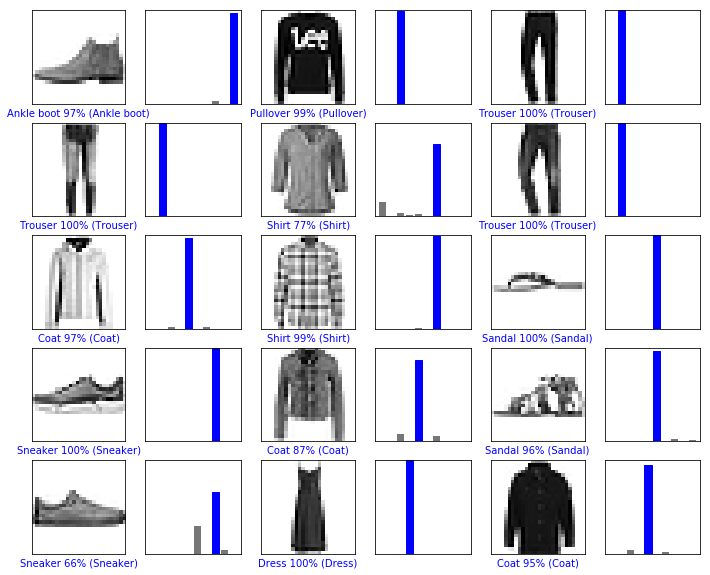

In [28]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)
plt.show()

### 訓練済みモデルを使って1枚の画像に対する予測を行う

In [29]:
img = test_images[0]
print(img.shape)

(28, 28)


```tf.keras``` はサンプルの中バッチについて予測を行うように作られている

1枚の画像を使う場合でも，リスト化する必要あり

In [30]:
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [31]:
predictions_single = model.predict(img)
print(predictions_single)

[[2.3740944e-05 3.1604532e-09 1.4992208e-06 7.6003879e-08 2.8737354e-06
  1.1539481e-03 1.7921324e-05 2.9707629e-02 3.9097060e-05 9.6905333e-01]]


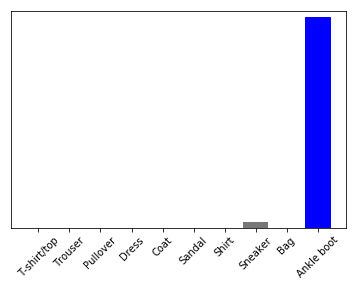

In [32]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

- ```model.predict``` メソッドの戻り値はリストのリスト
- リストの要素のそれぞれが，バッチの中の画像に対応

In [33]:
prediction = predictions[0]
np.argmax(prediction)

9